In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [108]:
data = pd.read_csv(r"E:\Machine Learning AMIT\Datasets\clean_data.csv")

In [109]:
data.head(10)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
5,5008819,1,1,1,0,0,0,0,0,2,17,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0
6,5008825,0,1,0,0,0,0,0,0,2,25,130500.0,29.210730,3.019911,Working,Incomplete higher,Married,House / apartment,Accountants,1
7,5008830,0,0,1,0,1,0,0,0,2,31,157500.0,27.463945,4.021985,Working,Secondary / secondary special,Married,House / apartment,Laborers,1
8,5008834,0,0,1,0,0,0,0,1,2,44,112500.0,30.029364,4.435409,Working,Secondary / secondary special,Single / not married,House / apartment,Other,0
9,5008836,1,1,1,0,0,0,0,3,5,24,270000.0,34.741302,3.184186,Working,Secondary / secondary special,Married,House / apartment,Laborers,0


In [110]:
data.shape

(9709, 20)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

# Preproccesing

In [112]:
data.isna().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

## This shows that there are no null values

In [113]:
data.duplicated().sum()

0

## This shows that there are no duplicated values

In [114]:
data.drop(['ID'] , axis = 1 , inplace = True )

In [115]:
data.shape

(9709, 19)

In [116]:
data['Target'].value_counts() 

0    8426
1    1283
Name: Target, dtype: int64

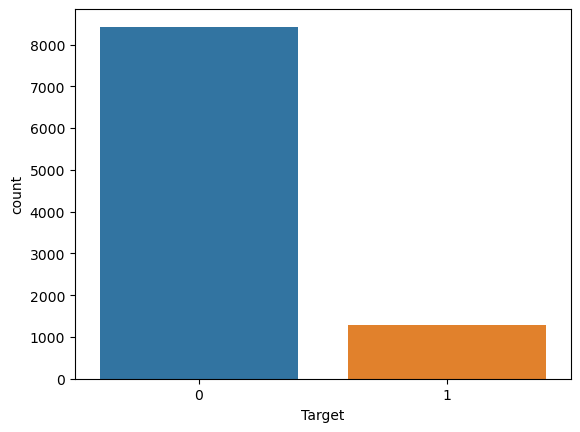

In [117]:
sns.countplot( x = 'Target' , data = data )
plt.show()

## This shows that the data is unbalanced

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Work_phone       9709 non-null   int64  
 4   Phone            9709 non-null   int64  
 5   Email            9709 non-null   int64  
 6   Unemployed       9709 non-null   int64  
 7   Num_children     9709 non-null   int64  
 8   Num_family       9709 non-null   int64  
 9   Account_length   9709 non-null   int64  
 10  Total_income     9709 non-null   float64
 11  Age              9709 non-null   float64
 12  Years_employed   9709 non-null   float64
 13  Income_type      9709 non-null   object 
 14  Education_type   9709 non-null   object 
 15  Family_status    9709 non-null   object 
 16  Housing_type     9709 non-null   object 
 17  Occupation_typ

In [119]:
data['Years_employed'].unique()

array([12.43557363,  3.10478655,  8.35335428, ...,  3.81664237,
       22.34405908,  1.65917165])

# Enable Encoder

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Work_phone       9709 non-null   int64  
 4   Phone            9709 non-null   int64  
 5   Email            9709 non-null   int64  
 6   Unemployed       9709 non-null   int64  
 7   Num_children     9709 non-null   int64  
 8   Num_family       9709 non-null   int64  
 9   Account_length   9709 non-null   int64  
 10  Total_income     9709 non-null   float64
 11  Age              9709 non-null   float64
 12  Years_employed   9709 non-null   float64
 13  Income_type      9709 non-null   object 
 14  Education_type   9709 non-null   object 
 15  Family_status    9709 non-null   object 
 16  Housing_type     9709 non-null   object 
 17  Occupation_typ

In [121]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# list of column names to be encoded
columns_to_be_encoded = ['Income_type' , 'Income_type' , 'Family_status' , 'Housing_type' , 'Occupation_type' , 'Education_type' ]  

# Instantiate the encoders
encoders = { column : LabelEncoder() for column in columns_to_be_encoded}

for column in columns_to_be_encoded:
    data[column] = encoders[column].fit_transform(data[column])

In [122]:
data['Income_type'].unique()

array([4, 0, 1, 2, 3], dtype=int64)

In [123]:
data['Education_type'].unique()

array([1, 4, 2, 3, 0])

# Normal Distribution to All Features 

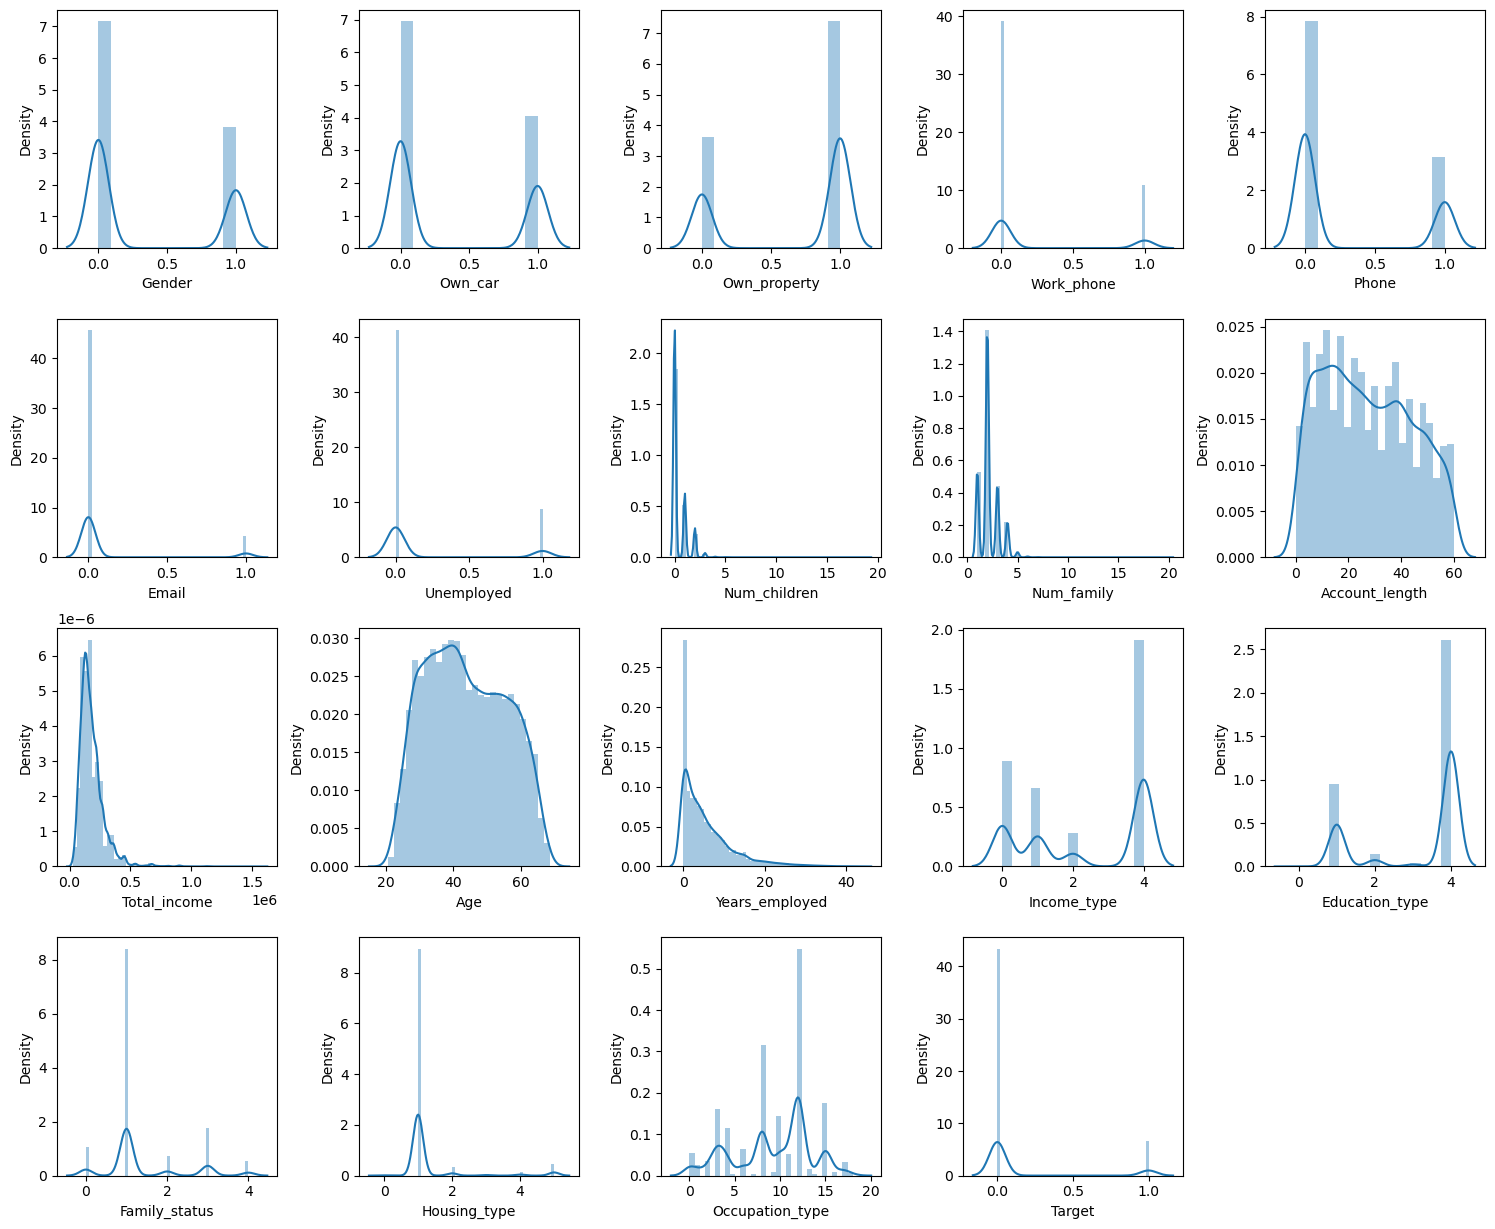

In [124]:
plt.figure( figsize = ( 15 , 15 ) )
j = 1

for col in data.columns:
    plt.subplot( 5 , 5 , j )
    sns.distplot( data[col] )
    j+=1
plt.tight_layout ( pad = 0.9 )
plt.show()



# Correlation 

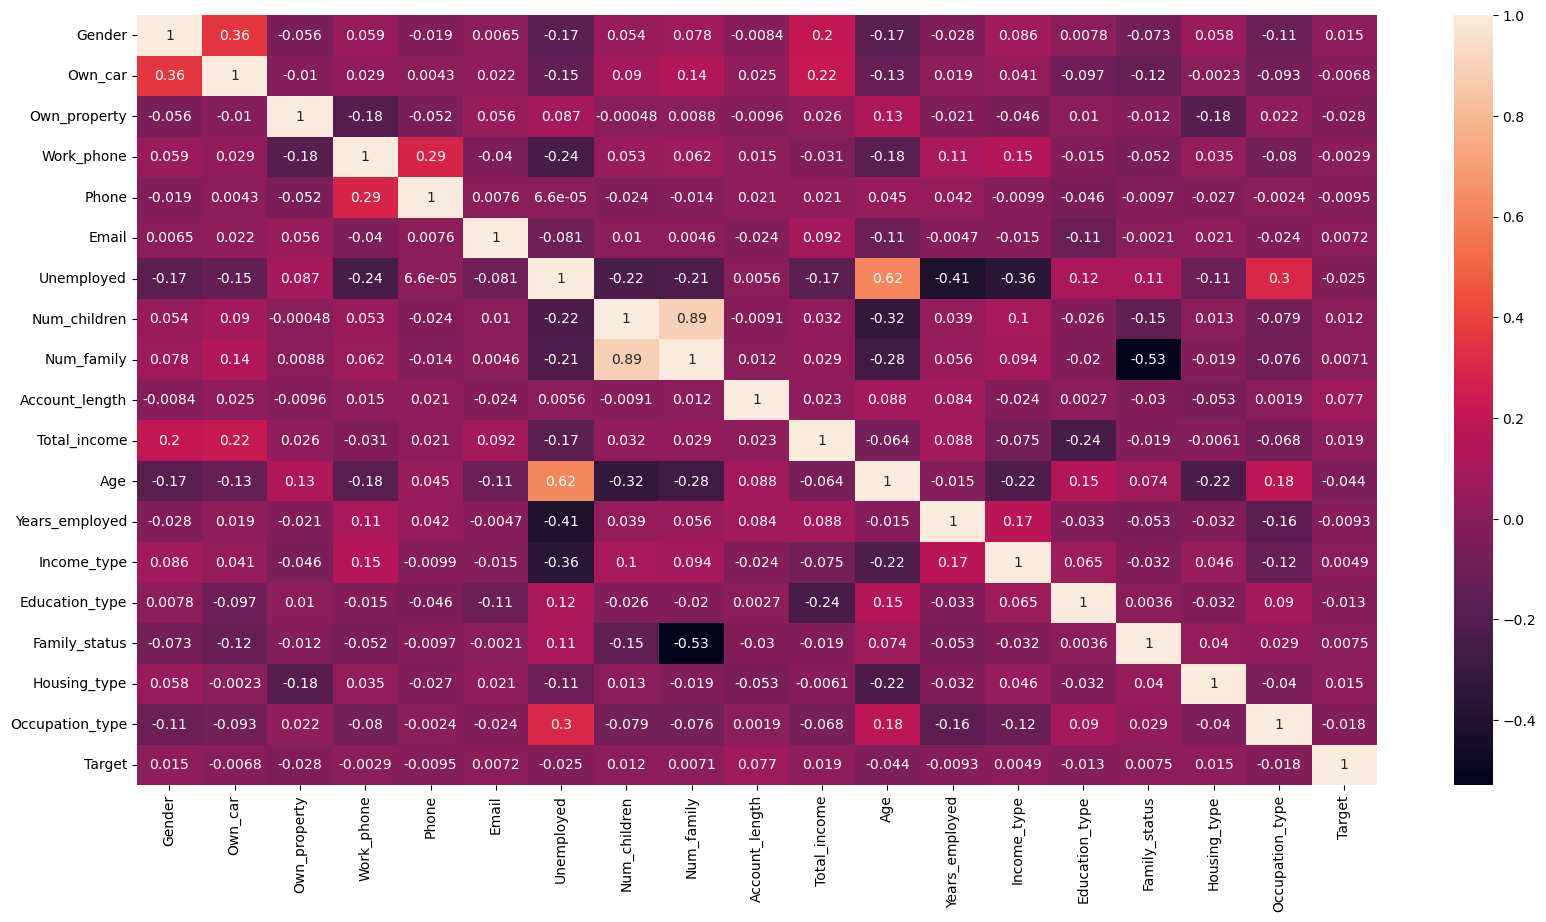

In [125]:
plt.figure( figsize = (20,10) )
sns.heatmap( data.corr() , annot = True ) 

plt.show()

In [126]:
y = data.loc[ : , 'Target'].values 
data.drop( ['Target'] , axis = 1 , inplace=True ) 
x = data.iloc[ : , : ].values 

In [127]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split( x , y , test_size = 0.2 , random_state = 20 ) #train 80% ,test 20%

In [128]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()


In [129]:
from sklearn.preprocessing import StandardScaler # 3malna scaling 3shan mydenash warning w ehna bn-fit el model
sd = StandardScaler()
train_x = sd.fit_transform ( train_x )
test_x = sd.transform ( test_x )

In [131]:
log_model.fit( train_x , train_y) 

LogisticRegression()

# Evaluate Model :

In [133]:
y_pred = log_model.predict( test_x )

In [134]:
from sklearn.metrics import accuracy_score
print("Accuracy: " , accuracy_score(y_pred,test_y)*100,' %')

Accuracy:  86.45726055612771  %


In [136]:
from sklearn.metrics import confusion_matrix 
print( confusion_matrix( y_pred , test_y))

[[1679  263]
 [   0    0]]


In [137]:
from sklearn.metrics import recall_score , precision_score , accuracy_score , f1_score
print("Accuracy : " , accuracy_score ( test_y , y_pred ) )
print("Recall : " , recall_score ( test_y , y_pred ) )
print("Precision : " , precision_score ( test_y , y_pred ) )
print("F1 Score : " , f1_score ( test_y , y_pred ) )



Accuracy :  0.864572605561277
Recall :  0.0
Precision :  0.0
F1 Score :  0.0
